In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load CSV file into memory

In [ ]:
data = pandas.read_csv('Uber.csv');

In [125]:
data['Date/Time'] = data['Date/Time'].map(pandas.to_datetime)

In [126]:
data.head()

,Date/Time,Lat,Lon,Base
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512


In [127]:
def get_weekday(dt):
    return dt.weekday()

In [128]:
def get_day_of_month(dt):
    return dt.day

In [129]:
def get_hour(dt):
    return dt.hour

In [1]:
data['dom'] = data['Date/Time'].map(get_day_of_month)
data['weekday'] = data['Date/Time'].map(get_weekday)
data['hour'] = data['Date/Time'].map(get_hour)

NameError: name 'data' is not defined

In [131]:
data.tail()

,Date/Time,Lat,Lon,Base,dom,weekday,hour
1028131,2014-09-30 22:57:00,40.7668,-73.9845,B02764,30,1,22
1028132,2014-09-30 22:57:00,40.6911,-74.1773,B02764,30,1,22
1028133,2014-09-30 22:58:00,40.8519,-73.9319,B02764,30,1,22
1028134,2014-09-30 22:58:00,40.7081,-74.0066,B02764,30,1,22
1028135,2014-09-30 22:58:00,40.7140,-73.9496,B02764,30,1,22


## Analysis

### Analyze the DoM

Text(0.5, 1.0, 'Frequency of DoM - uber - Sept 2014')

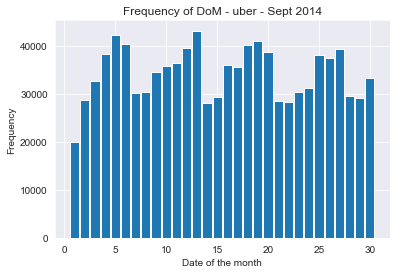

In [132]:
plt.hist(data.dom, bins=30, rwidth=.9, range=(0.5, 30.5))
plt.xlabel('Date of the month')
plt.ylabel('Frequency')
plt.title('Frequency of DoM - uber - Sept 2014')

In [133]:
def count_rows(rows):
    return len(rows)

In [134]:
by_date = data.groupby('dom').apply(count_rows)

<BarContainer object of 30 artists>

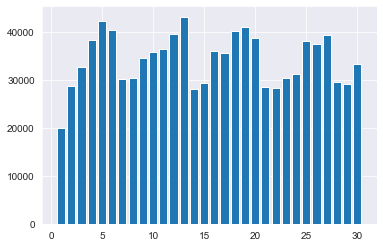

In [135]:
plt.bar(range(1,31), by_date)

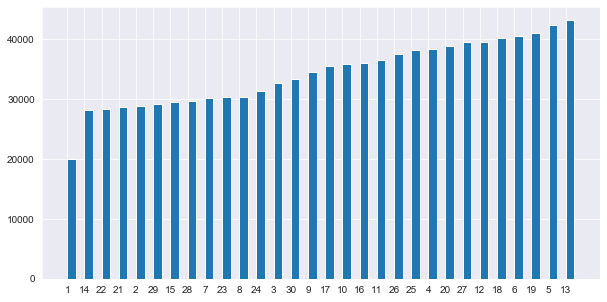

In [136]:
by_date_sorted = by_date.sort_values()
plt.figure(figsize=(10, 5))
plt.bar(range(1,31), by_date_sorted, align='edge', width=0.5)
plt.xticks(range(1, 31), by_date_sorted.index,);

## Analysis Hour

Text(0.5, 1.0, 'Frequency of Day - uber - Sept 2014')

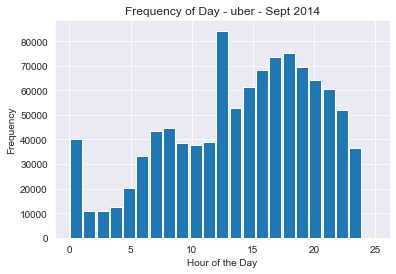

In [148]:
plt.hist(data.hour, bins=23, rwidth=.9, range=(0, 25))
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.title('Frequency of Day - uber - Sept 2014')

## Analysis Weekday

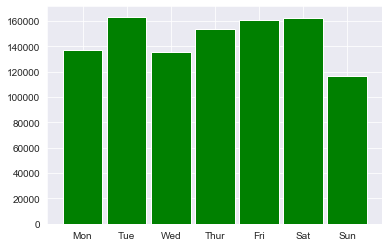

In [151]:
plt.hist(data.weekday, bins=7, range=(-0.5, 6.5), rwidth=.9, color='green')
plt.xticks(range(7),'Mon Tue Wed Thur Fri Sat Sun'.split());

## Cross Analysis (Hour, DoM)

In [161]:
by_cross = data.groupby('weekday hour'.split()).apply(count_rows).unstack()

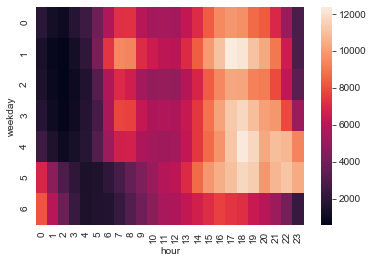

In [162]:
sns.heatmap(by_cross)

## By Lat & Lon

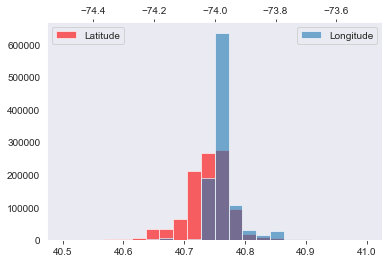

In [216]:
plt.hist(data['Lat'], bins= 22, range=(40.5,41.0) , label='Latitude',color='red', alpha=0.6); #bin = 1 + 3.322log
plt.grid();
plt.legend(loc='upper left')
plt.twiny();
plt.hist(data['Lon'], bins = 22, range=(-74.5, -73.5), label='Longitude', alpha= 0.6);
plt.legend(loc='upper right')
plt.grid();
plt.show();

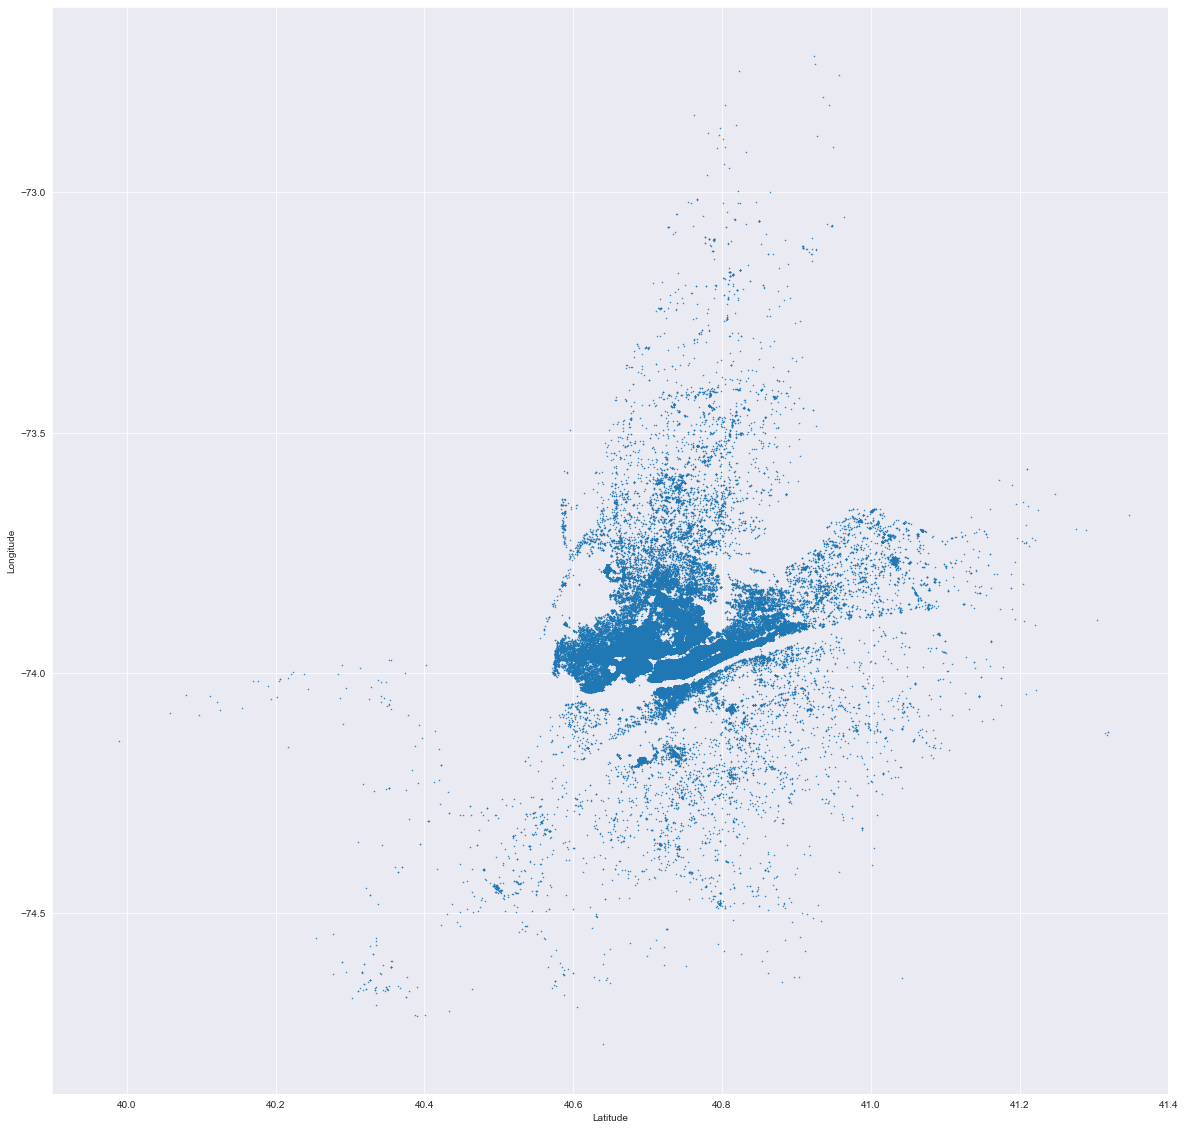

In [236]:
plt.figure(figsize=(20,20))
plt.plot(data['Lat'], data['Lon'], '.', ms=1, alpha=1.0);
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.xlim(39.9, 41.4);